# Ï†ÑÌÜµÏ†Å ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÎßÅ

   ## Ïú†ÌÜµÎß§Ïû• ÏàòÏöîÎüâ ÏòàÏ∏°

* ÎπÑÏ¶àÎãàÏä§ ÌòÑÌô©
    * Í≥†Í∞ùÏÇ¨Îäî A Ïú†ÌÜµÌöåÏÇ¨Ïùò a Îß§Ïû• ÏûÖÎãàÎã§.
    * a Îß§Ïû•ÏóêÏÑú Ï£ºÎ†•ÏÉÅÌíàÏù∏ a01Ïóê ÎåÄÌïú Ïû¨Í≥† ÏµúÏ†ÅÌôîÎ•º ÏúÑÌï¥ ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°ÌïòÍ≥†Ïûê Ìï©ÎãàÎã§.
    * ÏµúÍ∑º Í≤ΩÏüÅÏÇ¨Ïùò Îß§Ïû•Ïù¥ Í∞ÄÍπåÏö¥ Í±∞Î¶¨Ïóê Ïò§ÌîàÌïòÏòÄÍ≥†, Ïú†ÏÇ¨Ìïú ÏÉÅÌíàÏóê ÎåÄÌïú Í≥µÍ≤©Ï†ÅÏù∏ ÎßàÏºÄÌåÖÏùÑ ÌéºÏπòÍ≥† ÏûàÏäµÎãàÎã§. 
* Î∞úÏ£º ÏµúÏ†ÅÌôîÎ•º ÏúÑÌïú ÏàòÏöîÎüâ ÏòàÏ∏° : 1ÏùºÌõÑÏùò ÌåêÎß§ÎüâÏùÑ ÏòàÏ∏°

![](https://www.artefact.com//wp-content/uploads/2021/08/GettyImages-1295864156-scaled.jpg)

# 1.ÌôòÍ≤ΩÏ§ÄÎπÑ

## (1) ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

## (2) Ìï®Ïàò ÏÉùÏÑ± 

* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [2]:
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî
    plt.figure(figsize = (20,12))
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

* ÏûîÏ∞®Î∂ÑÏÑù

In [3]:
def residual_diag(residuals, lags = 30) :
    print('* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) : ', round(spst.shapiro(residuals)[1],5))
    print('* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

## (3) Data Loading

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path)
data = data.loc[(data['date']>= '2013-06-01') & (data['date']< '2015-03-01')].reset_index(drop = True)
data.head(10)

date  item  sales  tot_sales  comp_sales
0  2013-06-01    28    124       1016          80
1  2013-06-02    28    139       1019          93
2  2013-06-03    28     77        676          65
3  2013-06-04    28     93        764          80
4  2013-06-05    28    117        818          80
5  2013-06-06    28    112        881          71
6  2013-06-07    28    127        929          81
7  2013-06-08    28    105        925          78
8  2013-06-09    28    129        998          95
9  2013-06-10    28    103        710          74

* Î≥ÄÏàò ÏÑ§Î™Ö

    * date : ÎÇ†Ïßú
    * item : ÏÉÅÌíàÏΩîÎìú (Ïó¨Í∏∞ÏÑúÎäî ÌïúÍ∞ÄÏßÄ ÏÉÅÌíàÎßå ÏûàÏùå)
    * sales : AÏú†ÌÜµÌöåÏÇ¨ a Îß§Ïû• ÌåêÎß§Îüâ ==> target
    * tot_sales : AÏú†ÌÜµÌöåÏÇ¨ Ï†ÑÏ≤¥ ÌåêÎß§Îüâ
    * comp_sales : Ïù∏Í∑ºÏóê ÏúÑÏπòÌïú BÏú†ÌÜµÌöåÏÇ¨ b Îß§Ïû• ÌåêÎß§Îüâ

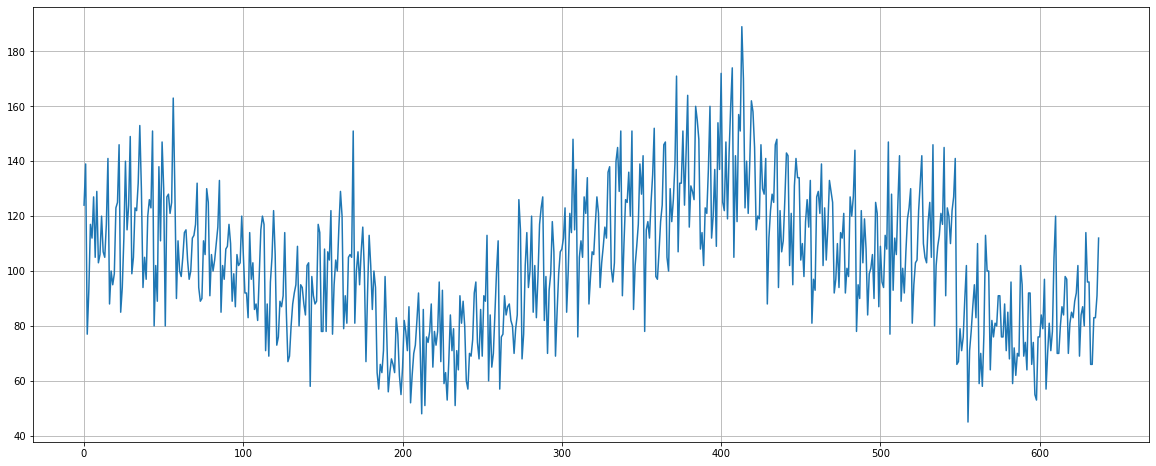

In [5]:
plt.figure(figsize = (20,8))
plt.plot(data['sales'])
plt.grid()
plt.show()

# 2.Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

## (1) y ÎßåÎì§Í∏∞

* 1Ïùº ÌõÑ ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°ÌïòÎ†§Î©¥, yÎ•º Ïñ¥ÎñªÍ≤å ÎßåÎì§Ïñ¥Ïïº Ìï†ÍπåÏöî?

In [6]:
data['y'] = data['sales'].shift(-1)
display(data.head())
display(data.tail())

date  item  sales  tot_sales  comp_sales      y
0  2013-06-01    28    124       1016          80  139.0
1  2013-06-02    28    139       1019          93   77.0
2  2013-06-03    28     77        676          65   93.0
3  2013-06-04    28     93        764          80  117.0
4  2013-06-05    28    117        818          80  112.0

date  item  sales  tot_sales  comp_sales      y
633  2015-02-24    28     66        603          71   83.0
634  2015-02-25    28     83        622          61   83.0
635  2015-02-26    28     83        611          48   91.0
636  2015-02-27    28     91        696          74  112.0
637  2015-02-28    28    112        774          77    NaN

In [7]:
# Ï†úÏùº ÎßàÏßÄÎßâ ÌñâÏùÄ ÏÇ≠Ï†ú
data.dropna(axis = 0, inplace = True)
data.tail()

date  item  sales  tot_sales  comp_sales      y
632  2015-02-23    28     66        488          43   66.0
633  2015-02-24    28     66        603          71   83.0
634  2015-02-25    28     83        622          61   83.0
635  2015-02-26    28     83        611          48   91.0
636  2015-02-27    28     91        696          74  112.0

## (2) Feature Engineering
* ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ÏùÑ ÎèÑÏ∂úÌï¥ Î¥ÖÏãúÎã§.

## (3) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

### 1) x, y ÎÇòÎàÑÍ∏∞

In [8]:
target = 'y'

x = data.drop([target, 'date'], axis = 1) #Ï†úÍ±∞Ìï† Îïå, dateÎèÑ Ï†úÍ±∞
y = data.loc[:, target]

### 2) train, val Î∂ÑÌï†
* 1Ìöå Î∂ÑÌï† : train_test_split( x, y, test_size= , shuffle = False) 
    * test_size : ÏÜåÏàò - ÎπÑÏú®, ÏûêÏó∞Ïàò - Í∞ØÏàò
    * shuffle = False : ÏÑûÏßÄ ÎßêÍ≥† Îç∞Ïù¥ÌÑ∞ ÎÅùÏóêÏÑú test_size ÎßåÌÅº ÏûêÎ•¥Í∏∞
* k-fold cross validation for Time Seires : TimeSeriesSplit

In [9]:
# Ïó¨Í∏∞ÏÑúÎäî 1Ìöå Î∂ÑÌï†Î°ú ÏßÑÌñâÌï©ÎãàÎã§.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 30, shuffle = False)

# 3.Î™®Îç∏ÎßÅ1 : ARIMA

## (1) y Í∞í ÏÇ¥Ìé¥Î≥¥Í∏∞

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00746
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.54662
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


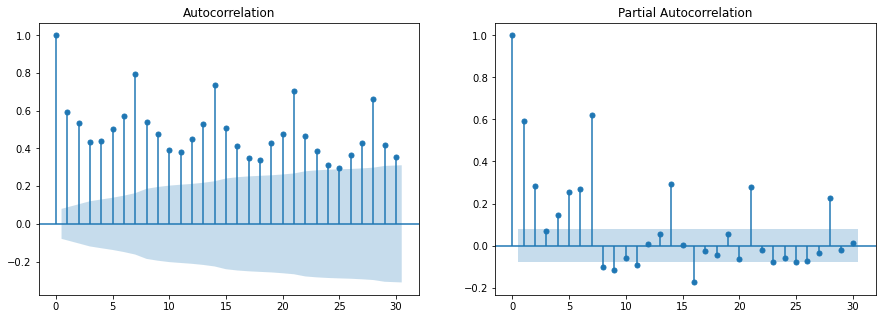

In [10]:
residual_diag(y_train, lags = 30)

## (2) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

* p, d, q Í∞íÏùÑ Ïñ¥ÎñªÍ≤å Ï†ïÌï¥Ïïº Ìï†ÍπåÏöî?
* ARÏùò p Ï∞®ÏàòÏôÄ MA q Ï∞®Ïàò Î™®Îëê Í∞íÏù¥ ÌïÑÏöîÌï¥ Î≥¥ÏûÖÎãàÎã§. ÏùºÎã® 1, 1ÏùÑ ÏßÄÏ†ïÌï©ÏãúÎã§.

### 1) ÌïôÏäµ

* sm.tsa.SARIMAX(train, order=(p,d,q)).fit()
    * Î™®Îç∏ ÏÑ†Ïñ∏Ïãú trainÏù¥ Ìè¨Ìï®
    * .fit()ÏúºÎ°ú ÌïôÏäµ.

In [51]:
# ARIMA Î™®Îç∏ÎßÅ
m1_1 = sm.tsa.SARIMAX(y_train, order=(1,0,1)).fit() # ARMA
m1_2 = sm.tsa.SARIMAX(y_train, order=(1,1,1)).fit() # ARIMA

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Î™®Îç∏.resid : ÏûîÏ∞®Î•º ÎΩëÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
* ÏúÑÏóêÏÑú ÎßåÎì† Ìï®Ïàò residual_diag Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏûîÏ∞®ÏßÑÎã®ÏùÑ Ìï¥ Î¥ÖÏãúÎã§.

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  1e-05
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


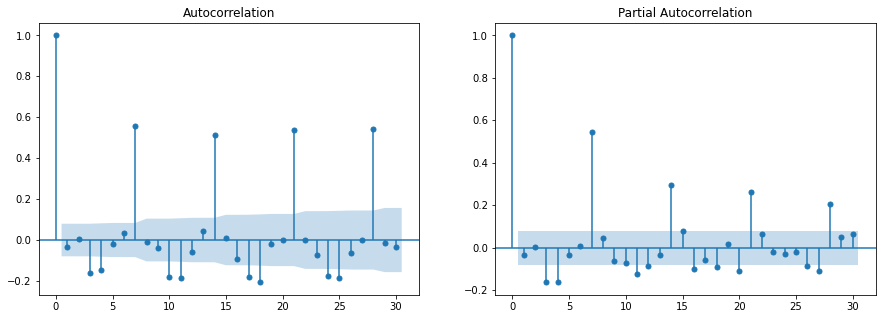

In [18]:
residuals = m1_1.resid  # y_trainÍ≥º ÏòàÏ∏°Í∞í Ï∞®Ïù¥
residual_diag(residuals)

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  1e-05
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


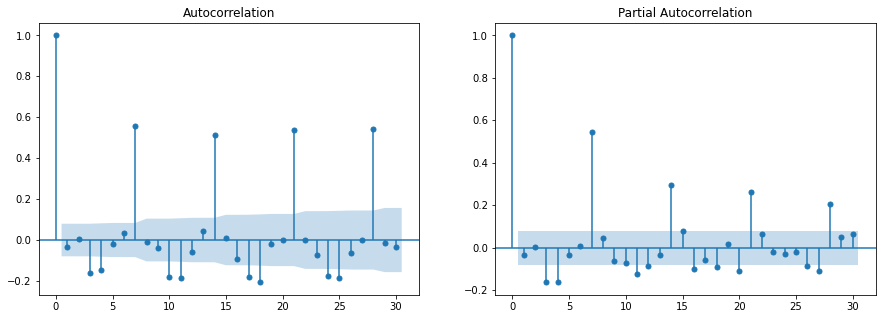

In [52]:
residuals = m1_2.resid
residual_diag(residuals)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò
* SARIMAX Î™®Îç∏.aicÎ°ú ÏâΩÍ≤å ÌÜµÍ≥ÑÎüâÏùÑ Íµ¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [53]:
print('model1 AIC :', m1_1.aic)
print('model1 AIC :', m1_2.aic)

model1 AIC : 5246.488864351655
model1 AIC : 5226.970492639296


#### ‚ë¢ Validation

ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏóê ÎåÄÌï¥ ÎπÑÍµêÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î¥ÖÏãúÎã§.

In [55]:
pred = m1_1.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 15.265834521749838
MAPE: 0.1613604151880646


In [56]:
pred = m1_2.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 14.898867116526409
MAPE: 0.15780557365356912


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

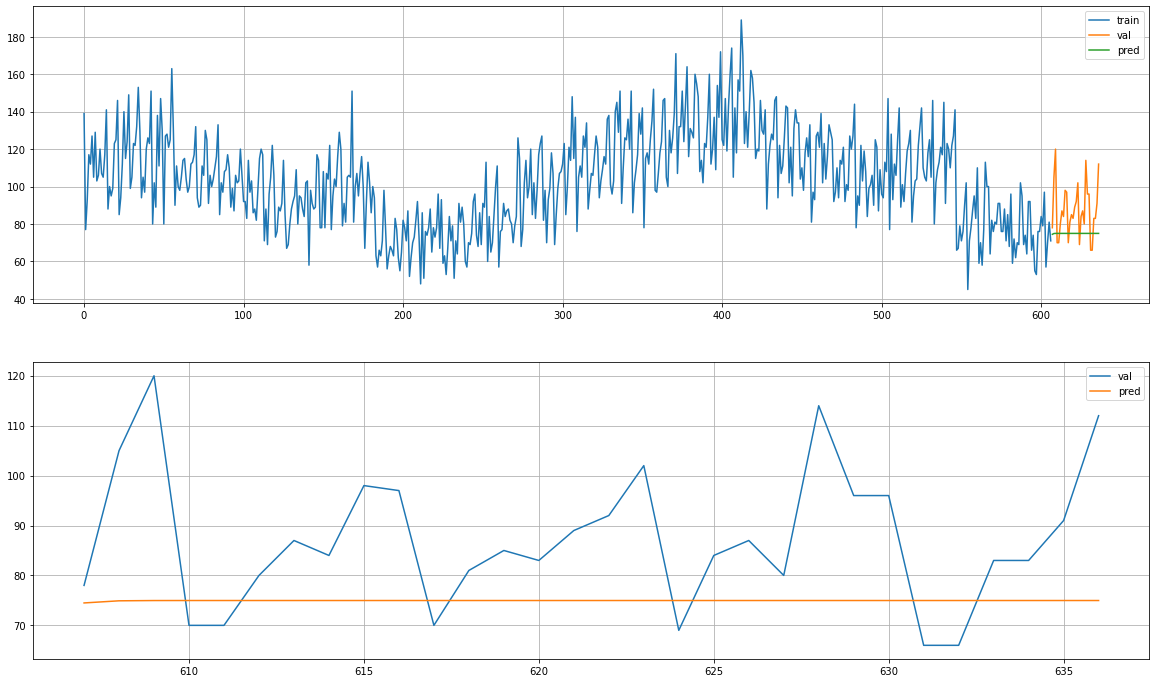

In [57]:
plot_model_result(y_train, y_val, pred)

## (3) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

Ïã§Ï†úÎ°ú p, d, qÎ•º Ï∞æÎäî Í≥ºÏ†ïÏùÄ ÎßàÏπò Grid Search Ï≤òÎüº Í∞íÏùÑ Ï°∞Í∏àÏî© Ï°∞Ï†ïÌï¥Í∞ÄÎ©∞  ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ Ï∞æÏïÑÍ∞ÄÎäî Í≥ºÏ†ïÍ≥º Ïú†ÏÇ¨Ìï©ÎãàÎã§.


### 1) ÌïôÏäµ

In [79]:
from itertools import product

* Í∞íÏùò Î≤îÏúÑ ÏßÄÏ†ï
    * ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ ÏÜåÏöîÎê† Ïàò ÏûàÏúºÎãà Î≤îÏúÑÎ•º Ï†ÅÏ†àÌïòÍ≤å ÏßÄÏ†ïÌïòÏÑ∏Ïöî.

In [80]:
# product Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞íÏùò Ï°∞Ìï©ÏùÑ Íµ¨ÏÑ±
p = [1,2,3,4,5]
q = [1,2,3,4,5]
d = [1]
iter = list(product(p,d,q))
iter

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5)]

* ÌäúÎãù

In [81]:
# 
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 1, 5)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 1, 5)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 1, 5)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)
(4, 1, 5)
(5, 1, 1)
(5, 1, 2)
(5, 1, 3)
(5, 1, 4)
(5, 1, 5)


In [82]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(p,d,q)        mae          aic
23     (5, 1, 4)  10.803027  4968.277283

params(p,d,q)        mae          aic
19     (4, 1, 5)  11.719058  4930.796837

In [83]:
# Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ p, d, q Í∞íÏúºÎ°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
m1_3 = sm.tsa.SARIMAX(y_train, order=(5,1,4)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


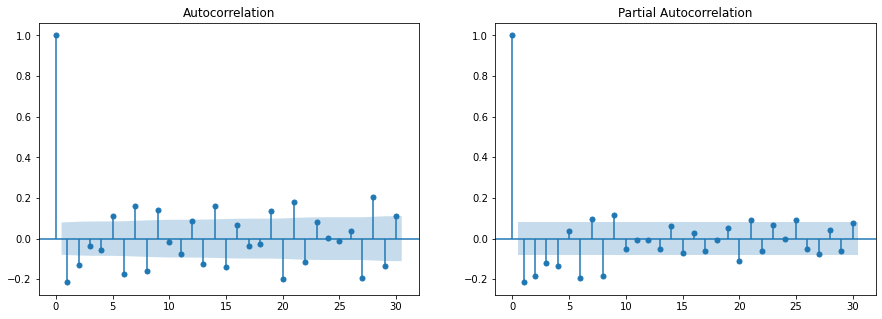

In [84]:
residuals = m1_3.resid
residual_diag(residuals) # seasonallity 

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [85]:
print('model2 AIC :', m1_3.aic)

model2 AIC : 4968.277283058964


#### ‚ë¢ Validation

In [86]:
p1 = m1_3.forecast(30)
print('MAE :', mean_absolute_error(y_val, p1))
print('MAPE:', mean_absolute_percentage_error(y_val, p1))

MAE : 10.803026728831268
MAPE: 0.1144206473208995


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

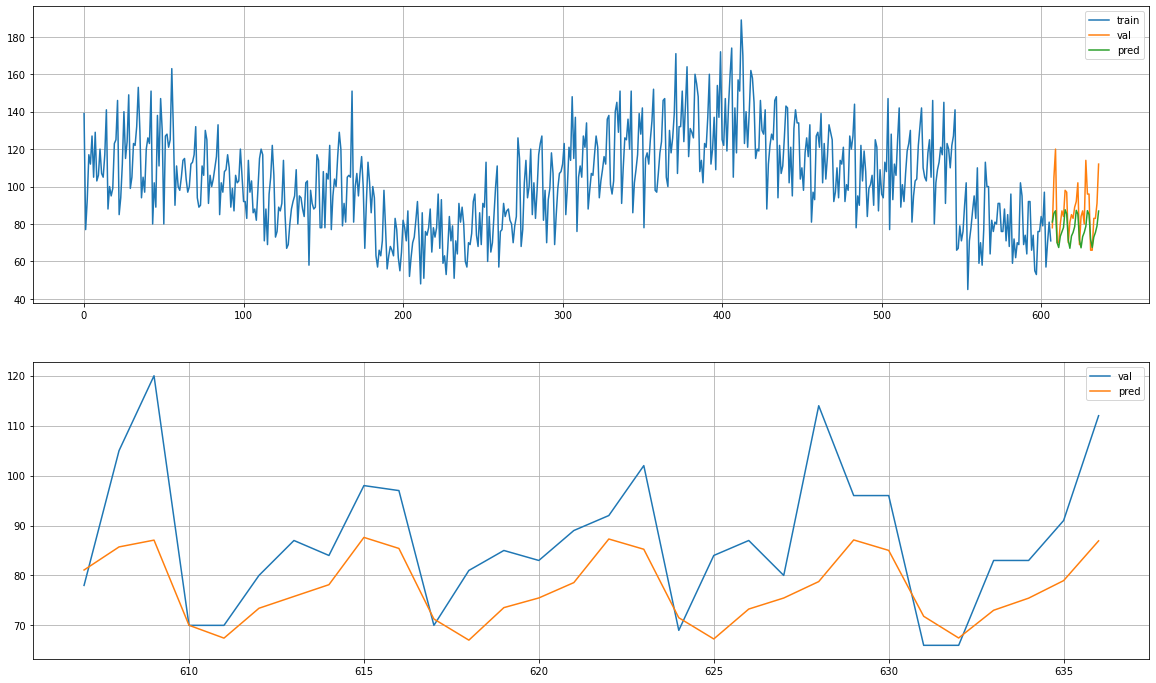

In [87]:
plot_model_result(y_train, y_val, p1)

# 4.Î™®Îç∏ÎßÅ2 : SARIMA

## (1) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

### 1) ÌïôÏäµ

In [88]:
# SARIMA Î™®Îç∏ÎßÅ : P, D, Q, m = 1,1,1,7 Î°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÏãúÎã§.
m2_1 = sm.tsa.SARIMAX(y_train, order=(5,1,4), seasonal_order=(1,1,1,7)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


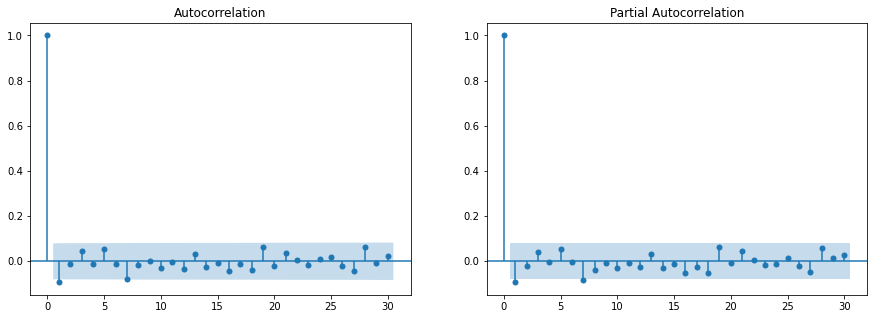

In [89]:
residuals = m2_1.resid
residual_diag(residuals)

#### ‚ë° AIC

In [90]:
print('model2_0 AIC :', m2_1.aic)

model2_0 AIC : 4683.414694555891


#### ‚ë¢ Validation

In [91]:
p2 = m2_1.forecast(30)
print('MAE :', mean_absolute_error(y_val, p2))
print('MAPE:', mean_absolute_percentage_error(y_val, p2))

MAE : 10.91161698358345
MAPE: 0.12341032706228083


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

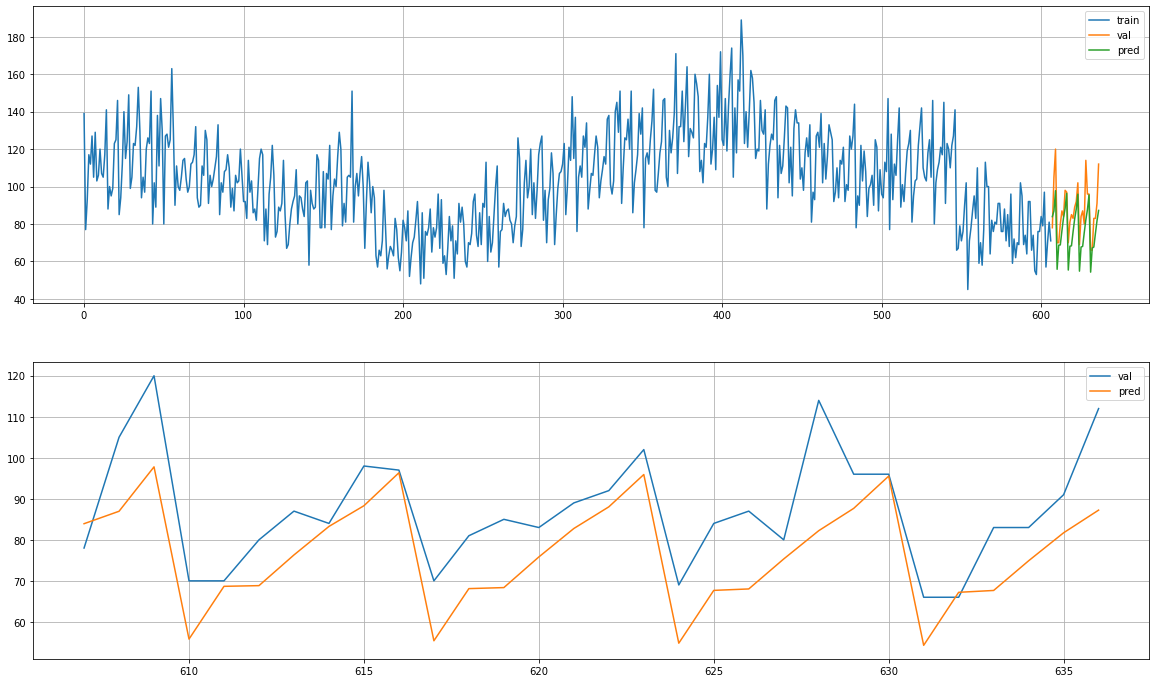

In [92]:
plot_model_result(y_train, y_val, p2)

## (2) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
* ÎÑàÎ¨¥ ÌÅ∞ Î≤îÏúÑÎ•º ÏßÄÏ†ïÌïòÎ©¥ ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ Í±∏Î¶ΩÎãàÎã§.
    * DÎäî 1Î°ú Í≥†Ï†ï
    * P, QÎäî 1 ~ 4 ÏÇ¨Ïù¥ÏóêÏÑú Í≤∞Ï†ï

### 1) ÌïôÏäµ

In [93]:
P = [1,2,3,4]
Q = [1,2,3,4]
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(4,1,4), seasonal_order=(i[0],i[1],i[2],7)).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [94]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(P,D,Q)       mae          aic
11     (3, 1, 4)  9.988931  4689.475919

params(P,D,Q)        mae          aic
0     (1, 1, 1)  11.223247  4677.848096

In [95]:
# Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ P, D, Q Í∞íÏúºÎ°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
m2_2 = sm.tsa.SARIMAX(y_train, order=(5,1,4), seasonal_order=( 3, 1, 4, 7)).fit()
m2_3 = sm.tsa.SARIMAX(y_train, order=(5,1,4), seasonal_order=( 1, 1, 1, 7)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


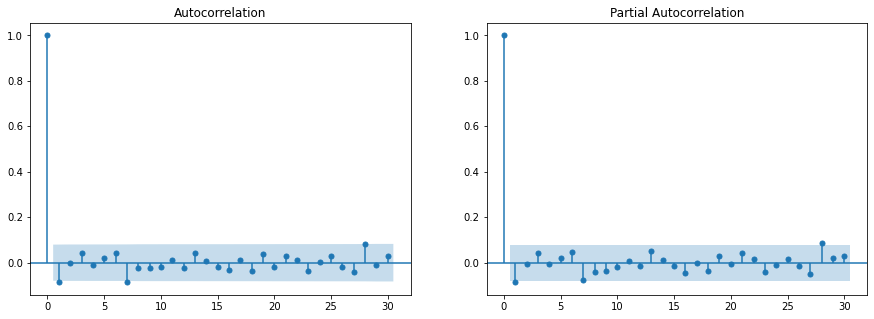

In [96]:
residuals = m2_2.resid
residual_diag(residuals)

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


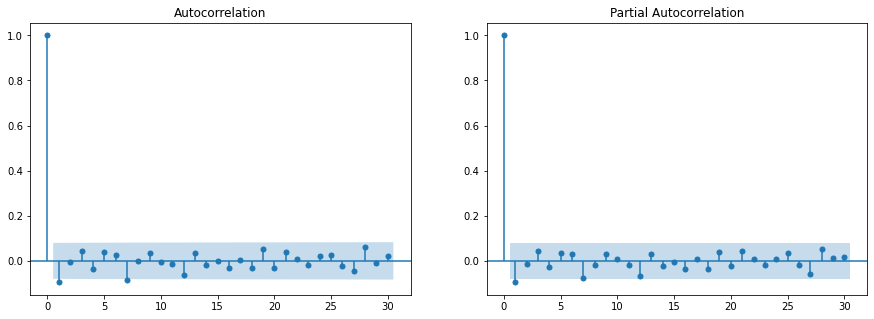

In [41]:
residuals = m2_3.resid
residual_diag(residuals)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [108]:
print('model2_2 AIC :', m2_2.aic)
print('model2_3 AIC :', m2_3.aic)

model2_2 AIC : 4690.502529386754
model2_3 AIC : 4683.414694555891


#### ‚ë¢ Validation

In [99]:
p3 = m2_3.forecast(30)
print('MAE :', mean_absolute_error(y_val, p3))
print('MAPE:', mean_absolute_percentage_error(y_val, p3))

MAE : 10.91161698358345
MAPE: 0.12341032706228083


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

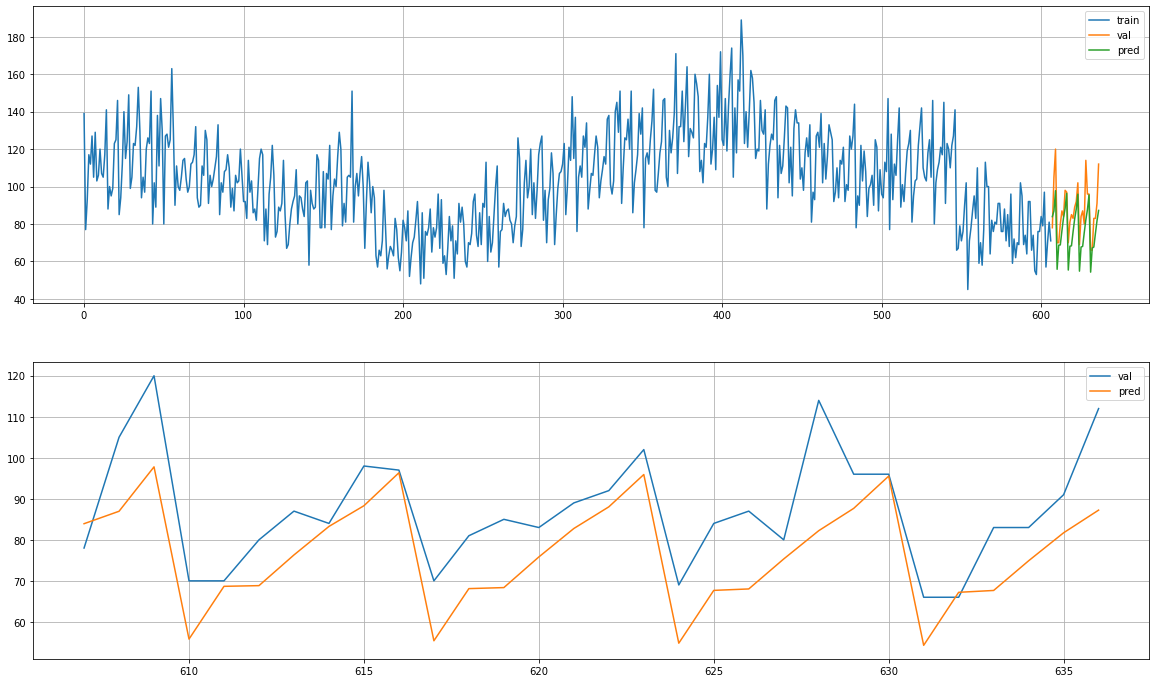

In [100]:
plot_model_result(y_train, y_val, p3)

# 5.Î™®Îç∏ÎßÅ3 : SARIMAX

## (1) Î™®Îç∏ÎßÅ

### 1) ÌïôÏäµ
* ÏúÑÏóêÏÑú Ï∞æÏùÄ Ï∞®Ïàò(p,d,q, P,D,Q,m) Ïóê x_trainÏùÑ ÎÑ£Ïñ¥ Î™®Îç∏ÎßÅÌï¥ Î¥ÖÏãúÎã§.

In [101]:
m3_1 = sm.tsa.SARIMAX(y_train, order=(5,1,4), seasonal_order=(1,1,1,7), exog=x_train).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


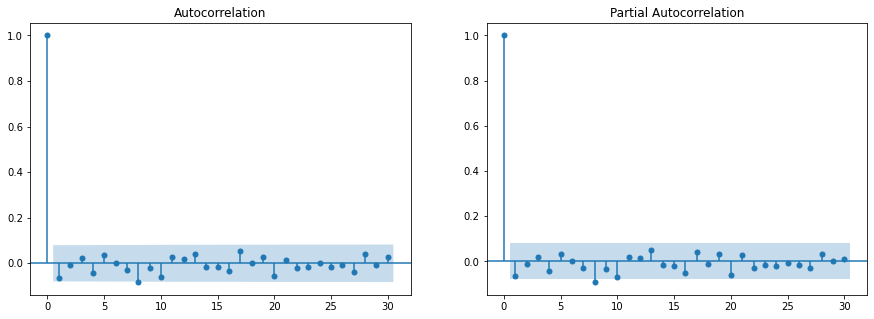

In [102]:
residuals = m3_1.resid
residual_diag(residuals)

#### ‚ë° AIC

In [107]:
print('m3_1 AIC :', m3_1.aic)

m3_1 AIC : 4638.40546114658


#### ‚ë¢ Validation
SARIMAX Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, ÏòàÏ∏°Ìï† ÎïåÎäî exog=x_val ÏòµÏÖòÏù¥ Îì§Ïñ¥Í∞ÄÏïº Ìï®.

In [106]:
pred = m3_1.forecast(30,  exog=x_val)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 7.864905488772549
MAPE: 0.08938078758795512


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

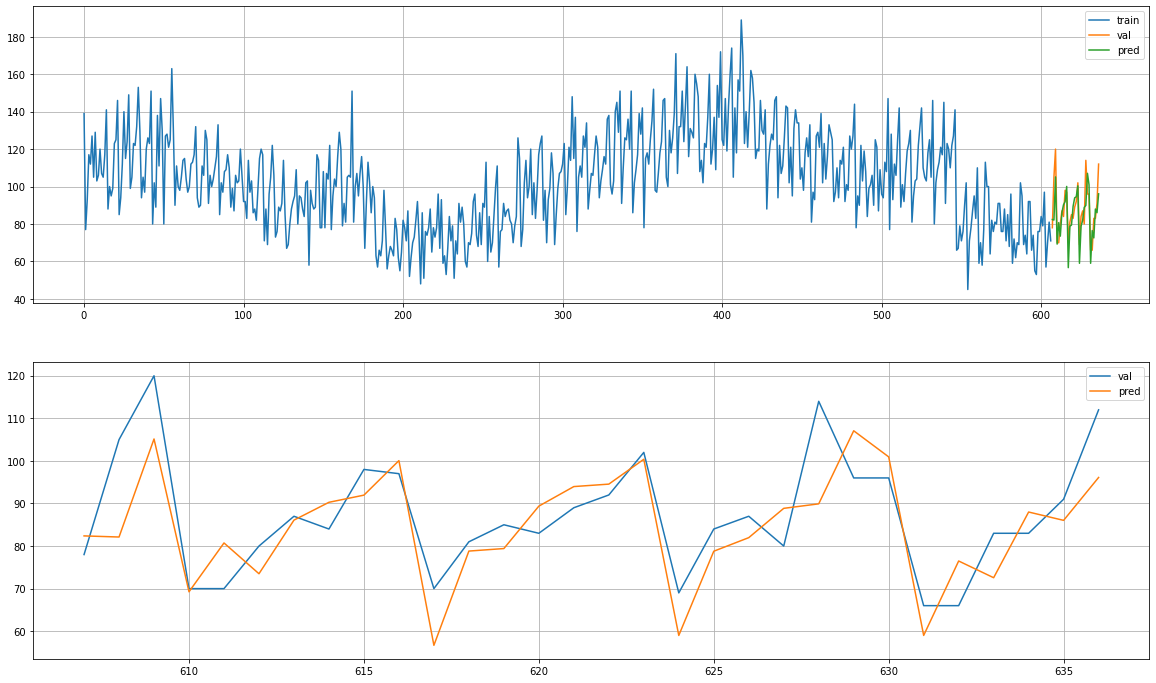

In [105]:
plot_model_result(y_train, y_val, pred)